[14.112226 14.997711]
[1.832631 1.709745]


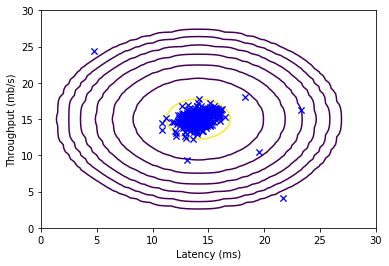

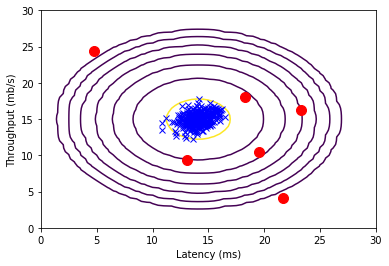

1.3772288907613575e-18
0.6153846153846154


In [1]:
%matplotlib inline
import sys
from numpy import *

import scipy.misc, scipy.io, scipy.optimize

from matplotlib import pyplot, cm, colors, lines
from mpl_toolkits.mplot3d import Axes3D

import inspect

import warnings
warnings.filterwarnings("ignore")

EX_DIRECTORY_PATH = './data/'

def multivariateGaussian( X, mu, sigma2 ):
    k             = len( mu )    
    m, n         = shape( X )
    temp_sigma2 = diag( sigma2 )
    temp_X         = X - mu

    p      = (2.0 * pi) ** (-k / 2.0) * linalg.det( temp_sigma2 ) ** -0.5 \
        * exp(-0.5 * sum((temp_X * diagonal( linalg.pinv( temp_sigma2 ) )) * temp_X, axis=1))

    return p


def estimateGaussian( X ):
    mu         = mean( X, axis=0 )
    sigma2     = var( X, axis=0 )
    return mu, sigma2

def plot( X ):
    pyplot.plot( X[:, 0], X[:, 1], 'bx' )
    pyplot.ylim([0, 30])
    pyplot.xlim([0, 30])

    pyplot.xlabel('Latency (ms)')
    pyplot.ylabel('Throughput (mb/s)')
    

def visualizeFit( X, mu, sigma2 ):

    X1 = mgrid[0:35.5:0.5]
    X2 = mgrid[0:35.5:0.5]
    X1, X2 = meshgrid( X1, X2 )

    Z = multivariateGaussian( c_[X1.T.ravel().T, X2.T.ravel().T], mu, sigma2 )
    Z = Z.reshape( shape(X1)[0], shape(X1)[1] ).T

    a = arange( -20, 0, 3 )
    b = ones( shape( a ) ) * 10

    pyplot.contour(X1, X2, Z, pow( b, a ) )


def selectThreshold( y_val, p_val ):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0

    step_size = (max(p_val) - min(p_val)) / 1000.0
    

    for epsilon in arange(min(p_val), max(p_val)+step_size, step_size ):
        prediction = (p_val < epsilon).reshape( shape( y_val)[0], 1 )

        true_pos  = sum((prediction == 1) & (y_val == 1))
        false_pos = sum((prediction == 1) & (y_val == 0))
        false_neg = sum((prediction == 0) & (y_val == 1))

        precision     = true_pos * 1.0 / (true_pos + false_pos)
        recall      = true_pos * 1.0 / (true_pos + false_neg)

        f1 = (2 * precision * recall) / (precision + recall)

        if f1 > best_f1:
            best_f1         = f1
            best_epsilon     = epsilon

    return best_f1, best_epsilon
    


def part1_1():
    mat          = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex8data1.mat" )
    X              = mat['X']
    X_val, y_val = mat['Xval'], mat['yval']

    plot( X )


def part1_2():
    mat          = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex8data1.mat" )
    X              = mat['X']

    mu, sigma2 = estimateGaussian( X )
    print(mu)
    print(sigma2)

    plot( X )
    visualizeFit( X, mu, sigma2 )
    pyplot.show( block=True )

def part1_3():
    mat          = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex8data1.mat" )
    X              = mat['X']
    X_val, y_val = mat['Xval'], mat['yval']

    mu, sigma2 = estimateGaussian( X )

    p       = multivariateGaussian( X, mu, sigma2 )
    p_val = multivariateGaussian( X_val, mu, sigma2 )    

    f1, epsilon = selectThreshold( y_val, p_val )
    outliers     = where( p < epsilon )


    plot( X )
    visualizeFit( X, mu, sigma2 )
    pyplot.plot( X[outliers, 0], X[outliers, 1], 'ro', lw=2, ms=10 )
    pyplot.show()

def part1_4():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex8data2.mat" )
    X              = mat['X']
    X_val, y_val = mat['Xval'], mat['yval']

    mu, sigma2 = estimateGaussian( X )

    p_val = multivariateGaussian( X_val, mu, sigma2 )
    

    f1, epsilon = selectThreshold( y_val, p_val )
    print (epsilon)
    print (f1)




def main():
    set_printoptions(precision=6, linewidth=200)
    part1_1()
    part1_2()
    part1_3()
    part1_4()
    


if __name__ == '__main__':
    main()